In [3]:
import requests
from pprint import pprint

In [4]:
#replace with your own FACE API key
sub_key = "<REPLACE WITH YOUR KEY"
assert sub_key

In [5]:
#replace with your own endpoint
base_url = "<REPLACE WITH YOUR OWN ENDPOINT"
face_api = base_url + "/detect"
face_api

'https://rjs-face-api.cognitiveservices.azure.com/face/v1.0/detect'

In [6]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Donald_Trump_official_portrait.jpg/1024px-Donald_Trump_official_portrait.jpg"

In [21]:
headers = {"Ocp-Apim-Subscription-Key": sub_key}

params = {'returnFaceId': 'true',
         'returnFaceLandmarks': 'false',
         'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,makeup'}
response = requests.post(face_api, params=params, headers=headers,json={"url": image_url})
results = response.json()
pprint(results)
type(results)
pprint(results[0]['faceRectangle'])


[{'faceAttributes': {'age': 62.0,
                     'emotion': {'anger': 0.0,
                                 'contempt': 0.0,
                                 'disgust': 0.0,
                                 'fear': 0.0,
                                 'happiness': 1.0,
                                 'neutral': 0.0,
                                 'sadness': 0.0,
                                 'surprise': 0.0},
                     'facialHair': {'beard': 0.1,
                                    'moustache': 0.1,
                                    'sideburns': 0.1},
                     'gender': 'male',
                     'glasses': 'NoGlasses',
                     'headPose': {'pitch': -5.0, 'roll': 0.3, 'yaw': 7.5},
                     'makeup': {'eyeMakeup': False, 'lipMakeup': False},
                     'smile': 1.0},
  'faceId': '68de9e1f-432b-4ea8-9cd5-ec618ac1653a',
  'faceRectangle': {'height': 341, 'left': 347, 'top': 364, 'width': 341}}]
{'height': 341, 'le

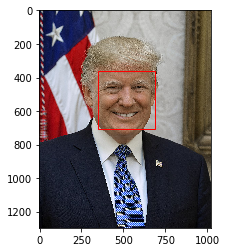

In [26]:

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import json 
from PIL import Image
from io import BytesIO
rec_points = results[0]['faceRectangle']
image = Image.open(BytesIO(requests.get(image_url).content))
pic = plt.imshow(image,)
rect = Rectangle((rec_points['left'],rec_points['top']),rec_points['height'],rec_points['width'],linewidth=1,edgecolor='r',facecolor='none')
pic.axes.add_patch(rect)
